In [1]:
# 1.Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Better visuals
plt.style.use("ggplot")

In [2]:
# 2.Load the Datasets
fake_df = pd.read_csv("../data/raw/Fake.csv")
true_df = pd.read_csv("../data/raw/True.csv")

In [3]:
# 3.Quick Inspection
print("Fake News Shape:", fake_df.shape)
print("True News Shape:", true_df.shape)
fake_df.head()

Fake News Shape: (23481, 4)
True News Shape: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#4.Add Labels (IMPORTANT)
fake_df["label"] = 0   # Fake news
true_df["label"] = 1   # Real news

In [6]:
# 5.Combine Both Datasets
df = pd.concat([fake_df, true_df], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [7]:
# 6.Basic Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
# 7.Class Distribution Check
df["label"].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

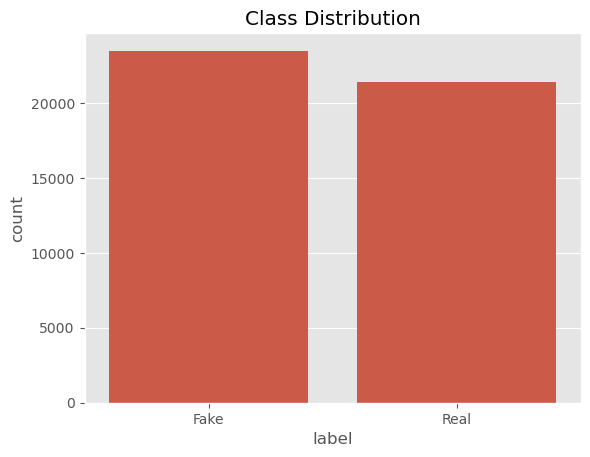

In [10]:
sns.countplot(x="label", data=df)
plt.xticks([0,1], ["Fake", "Real"])
plt.title("Class Distribution")
plt.show()

In [11]:
#8.Text Length Analysis
df["text_length"] = df["text"].apply(len)
df[["label", "text_length"]].groupby("label").describe()

text_length                                                         \
            count         mean          std  min     25%     50%     75%   
label                                                                      
0         23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0   
1         21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0   

                
           max  
label           
0      51794.0  
1      29781.0

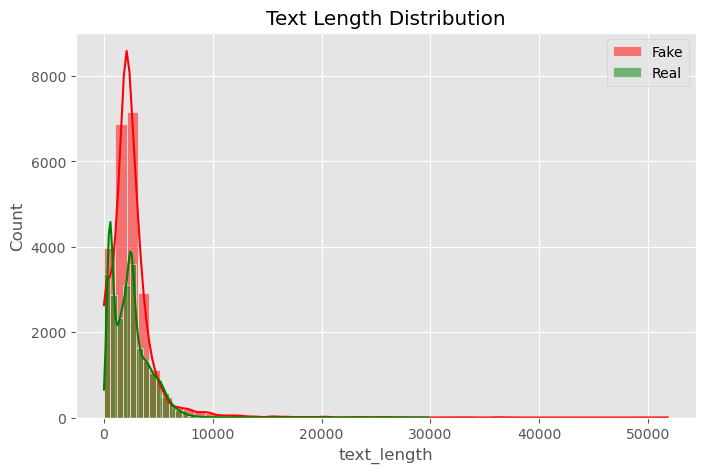

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["label"]==0]["text_length"], bins=50, label="Fake", color="red", kde=True)
sns.histplot(df[df["label"]==1]["text_length"], bins=50, label="Real", color="green", kde=True)
plt.legend()
plt.title("Text Length Distribution")
plt.show()

In [13]:
# 9.Select Useful Columns
df = df[["title", "text", "label"]]
df.head()

,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


In [14]:
# 1-Save Processed Dataset
df.to_csv("../data/processed/news_combined.csv", index=False)
print("✅ Dataset saved to data/processed/news_combined.csv")

✅ Dataset saved to data/processed/news_combined.csv


## ✅ STEP 1 OUTPUT (What You Achieved)

✔ Loaded real-world dataset
✔ Created labels correctly
✔ Merged & shuffled data
✔ Performed meaningful EDA
✔ Saved clean dataset